In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("US Superstore data.xls")

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
sales_by_state = df.groupby('State')['Sales'].sum()
top_states = sales_by_state.sort_values(ascending=False).head(10)
top_states


,Sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140
Florida,89473.7080
Illinois,80166.1010
Ohio,78258.1360
Michigan,76269.6140


In [ ]:
#Comparaison New york/ California
ny_sales = df[df['State'] == 'New York']['Sales'].sum()
ny_profit = df[df['State'] == 'New York']['Profit'].sum()

ca_sales = df[df['State'] == 'California']['Sales'].sum()
ca_profit = df[df['State'] == 'California']['Profit'].sum()

print("New York:")
print(f"Total Sales: {ny_sales}")
print(f"Total Profit: {ny_profit}")

print("\nCalifornia:")
print(f"Total Sales: {ca_sales}")
print(f"Total Profit: {ca_profit}")

print("\nDifference:")
print(f"Sales Difference (CA - NY): {ca_sales - ny_sales}")
print(f"Profit Difference (CA - NY): {ca_profit - ny_profit}")


New York:
Total Sales: 310876.27099999995
Total Profit: 74038.54859999998

California:
Total Sales: 457687.6315
Total Profit: 76381.38709999998

Difference:
Sales Difference (CA - NY): 146811.36050000007
Profit Difference (CA - NY): 2342.838499999998


In [ ]:

ny_customers = df[df['State'] == 'New York'].groupby('Customer Name').agg({'Sales': 'sum', 'Profit': 'sum'})

top_ny_customer_sales = ny_customers.sort_values(by='Sales', ascending=False).head(1)

top_ny_customer_profit = ny_customers.sort_values(by='Profit', ascending=False).head(1)

print("\nTop Customer in New York (by Sales):")
print(top_ny_customer_sales)

print("\nTop Customer in New York (by Profit):")
top_ny_customer_profit


print((f"{top_ny_customer_sales.index[0]} is an oustanding customer in New York"))


Top Customer in New York (by Sales):
                   Sales     Profit
Customer Name                      
Tom Ashbrook   13723.498  4599.2073

Top Customer in New York (by Profit):
Tom Ashbrook is an oustanding customer in New York


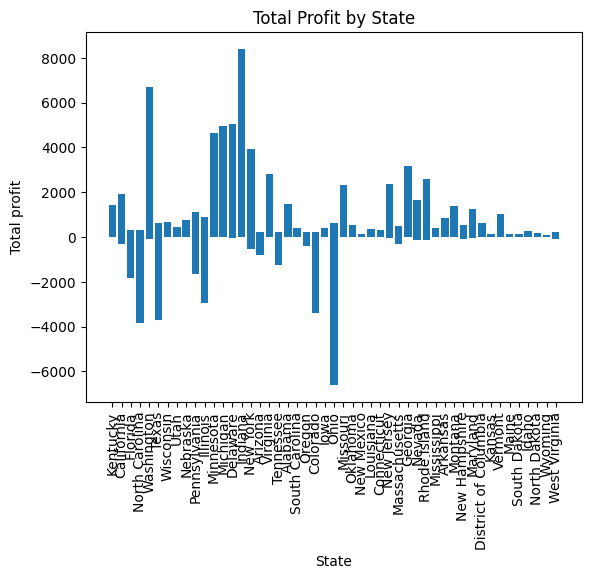

In [ ]:
plt.bar(df['State'], df['Profit'])
plt.xlabel('State')
plt.ylabel('Total profit')
plt.title('Total Profit by State')
plt.xticks(rotation=90)
plt.show()

We can see differences in profit among states; some have huge negative profits, while others are making substantial profits.


In [ ]:
import pandas as pd

total_profit = df['Profit'].sum()

customer_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)

cumulative_profit = customer_profit.cumsum()

cumulative_profit_percentage = (cumulative_profit / total_profit) * 100

num_customers_80_percent = (cumulative_profit_percentage[cumulative_profit_percentage <= 80]).count()

percentage_customers = (num_customers_80_percent / len(customer_profit)) * 100


print(f"Total Profit: {total_profit}")
print(f"Number of customers contributing to 80% of the profit: {num_customers_80_percent}")
print(f"Percentage of customers contributing to 80% of the profit: {percentage_customers:.2f}%")

if percentage_customers <= 20:
    print("Pareto principle (80/20 rule) holds for customers and profit.")
else:
    print("Pareto principle (80/20 rule) does not hold for customers and profit.")


Total Profit: 286397.0216999999
Number of customers contributing to 80% of the profit: 152
Percentage of customers contributing to 80% of the profit: 19.17%
Pareto principle (80/20 rule) holds for customers and profit.


In [ ]:
#City by total sales

total_sales_by_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# print(total_sales_by_city)
print(total_sales_by_city.head(20))

City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Detroit           42446.9440
Columbus          38706.2430
Newark            28576.1190
Columbia          25283.3240
Lafayette         25036.2000
Jackson           24963.8580
San Antonio       21843.5280
Burlington        21668.0820
Arlington         20214.5320
Dallas            20131.9322
Name: Sales, dtype: float64


In [ ]:
total_profit_by_city = df.groupby('City')['Profit'].sum().sort_values(ascending=False)

# print(total_profit_by_city)
print(total_profit_by_city.head(20))

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Springfield       6200.6974
Columbus          5897.1013
Newark            5793.7588
Columbia          5606.1167
Richmond          5567.2486
Providence        5505.6569
Henderson         4911.8609
Arlington         4169.6969
Lakewood          3234.0278
Milwaukee         2793.0851
Name: Profit, dtype: float64


In [ ]:
customer_by_sales= df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

# print(customer_by_sales)
print(customer_by_sales.head(20))

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Todd Sumrall          11891.751
Greg Tran             11820.120
Becky Martin          11789.630
Seth Vernon           11470.950
Caroline Jumper       11164.974
Clay Ludtke           10880.546
Maria Etezadi         10663.728
Karen Ferguson        10604.266
Bill Shonely          10501.653
Edward Hooks          10310.880
Name: Sales, dtype: float64


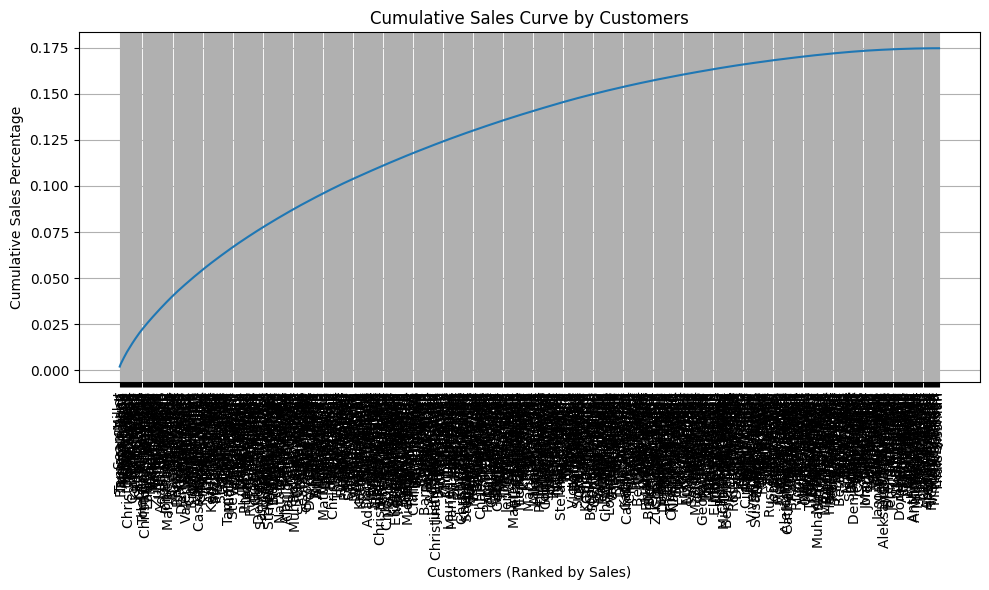

Number of customers contributing to 80% of total sales: 793
Percentage of customers contributing to 80% of total sales: 100.00%
Pareto principle (80/20 rule) does not hold for customers and sales.


In [ ]:
import matplotlib.pyplot as plt

cumulative_sales = customer_by_sales.cumsum()

cumulative_sales_percentage = (cumulative_sales / cumulative_sales.sum()) * 100

plt.figure(figsize=(10, 6))
plt.plot(cumulative_sales_percentage.index, cumulative_sales_percentage.values)
plt.xlabel('Customers (Ranked by Sales)')
plt.ylabel('Cumulative Sales Percentage')
plt.title('Cumulative Sales Curve by Customers')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

pareto_customers = (cumulative_sales_percentage[cumulative_sales_percentage <= 80]).count()
pareto_percentage = (pareto_customers / len(customer_by_sales)) * 100

print(f"Number of customers contributing to 80% of total sales: {pareto_customers}")
print(f"Percentage of customers contributing to 80% of total sales: {pareto_percentage:.2f}%")

if pareto_percentage <= 20:
    print("Pareto principle holds for customers and sales.")
else:
    print("Pareto principle does not hold for customers and sales.")


In [ ]:
# Prioritization based on analysis

# States: Prioritize states with high sales and profit.  The analysis already
# identified the top states by sales.  Further analysis could combine sales and
# profit for a more holistic prioritization.  Consider the profit margin as well
# (profit / sales).  States with both high sales and high profit margins should
# be top priorities.  For example, if California has higher sales than New York,
# but New York has a higher profit margin, then marketing strategies might
# need to be different for each state to maximize overall profitability.

# Cities: Prioritize cities with high sales and profit.  The code already shows
# the top cities by sales and profit.  Again, consider the profit margin.
# Additionally, consider the concentration of customers. Cities with a high
# number of high-value customers should receive more attention.

top_cities_by_profit = total_profit_by_city.head(5)  # Get the top 5 cities by profit

print("\nTop 5 cities for prioritized marketing based on profit:")
top_cities_by_profit





Top 5 cities for prioritized marketing based on profit:


,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
